In [15]:
### Importing all necessay packages .

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,roc_curve
warnings.filterwarnings('ignore')

In [16]:
### Loading the data

data = pd.read_csv("health care diabetes.csv")


In [17]:
### Viewing the data

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
### Shape of Data

data.shape


(768, 9)

In [19]:
### Viewing the datatypes of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
### Checking for null values .

data.columns[data.isna().any()]

Index([], dtype='object')

In [21]:
###  Viewing the Description of Data 

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
### Viewing the Data Count . 

data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<AxesSubplot:>

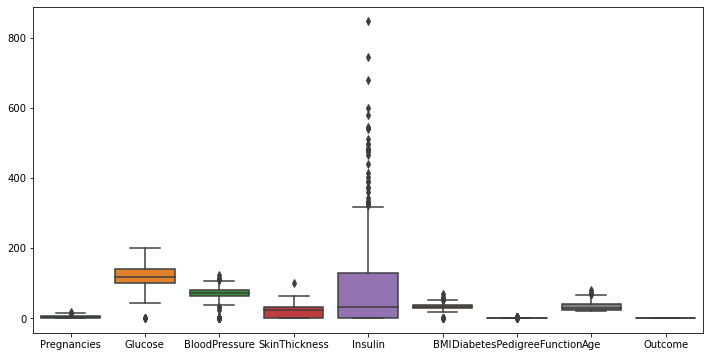

In [23]:
### Checking for outliers .

plt.figure(figsize=(12,6))
sns.boxplot(data=data)

In [24]:
### Defining a function that returns a lower and upper bounds . 

def cal_bounds(listbound):
    q1, q3= np.percentile(listbound,[25,75])
    iqr = q3 - q1
    upper = q3+(1.5 * iqr)
    lower = q1-(1.5*iqr)
   ## print(lower,upper)
    return lower,upper 

In [25]:
### Viewing the skewness of the data . Here all the values are greater than zero ,hence data is positively skewed .

data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [26]:
### Treating Outliers and missing values . Median is used for traeting the outliers ,as data is skewed . 

cols = ['Pregnancies','SkinThickness' ,'BloodPressure','Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age','Glucose']
no_zero_cols = [ 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' ]

### Copying the index of the rows with zero(missing) values and replacing zero's with median 

for col in no_zero_cols:     
    zero_index = data[data[col] == 0].index
    if len(zero_index) > 0:
        if data[col].dtype == 'int64': 
            data.loc[zero_index,col] = int(data[col].median())
        else:        
            data.loc[zero_index,col] = data[col].median()
            
for col in cols: 
###  Calculating the lower and upper bound and copying the index of the rows which has outliers     
    lower,upper = cal_bounds(data[col])
    out_index = data[(data[col] > upper)].index
    in_index = data[(data[col] < lower)].index
### Replacing the outliers with upper bound and lower bound //Trimming the outliers .    
    if data[col].dtype == 'int64': 
        data.loc[out_index,col] = int(upper)
        data.loc[in_index,col] = int(lower)                             
    else :
        data.loc[out_index,col] = upper
        data.loc[in_index,col] = lower
### If outliers still persist after trimming , replacing the outliers with median .         
    lower_new,upper_new = cal_bounds(data[col]) 
    
    o_index = data[ (data[col] > upper) | (data[col] < lower)  ].index
    if data[col].dtype == 'int64': 
            data.loc[o_index,col] = int(data[col].median())
    else:        
            data.loc[o_index,col] = data[col].median()
    

  
        


<AxesSubplot:>

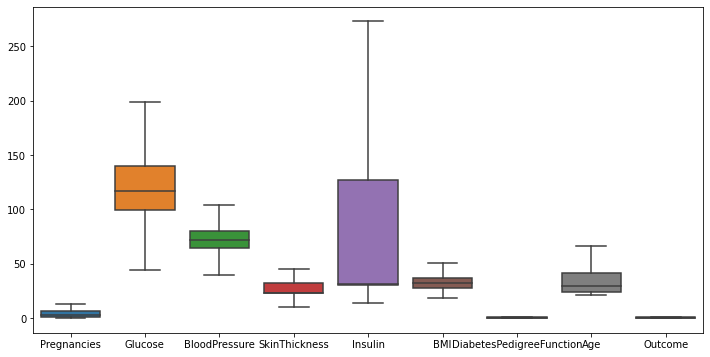

In [27]:
## Checking whether all outliers are treated . 
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

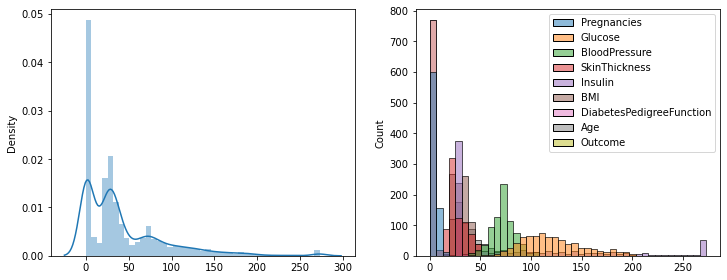

In [28]:
### Vizualising the Distribution of data 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(data)
plt.subplot(2,2,2)
sns.histplot(data=data)
plt.show()

<AxesSubplot:xlabel='Variable DataTypes', ylabel='frequency'>

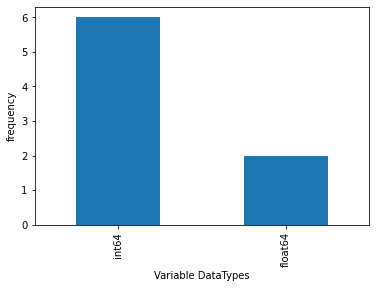

In [29]:
### Vizualisng the frequency of the datatypes of the variables .
data[cols].dtypes.value_counts().plot(kind='bar',xlabel='Variable DataTypes', ylabel='frequency')
## Here 6 variables are of type integer and 2 of them are type float.

In [30]:
### Finding the corrrelation among variables 

data[(data.corr() > 0.5) | (data.corr() < -0.5)].count()

## Here non of the variables are co-related , so we go ahead with Training the model 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

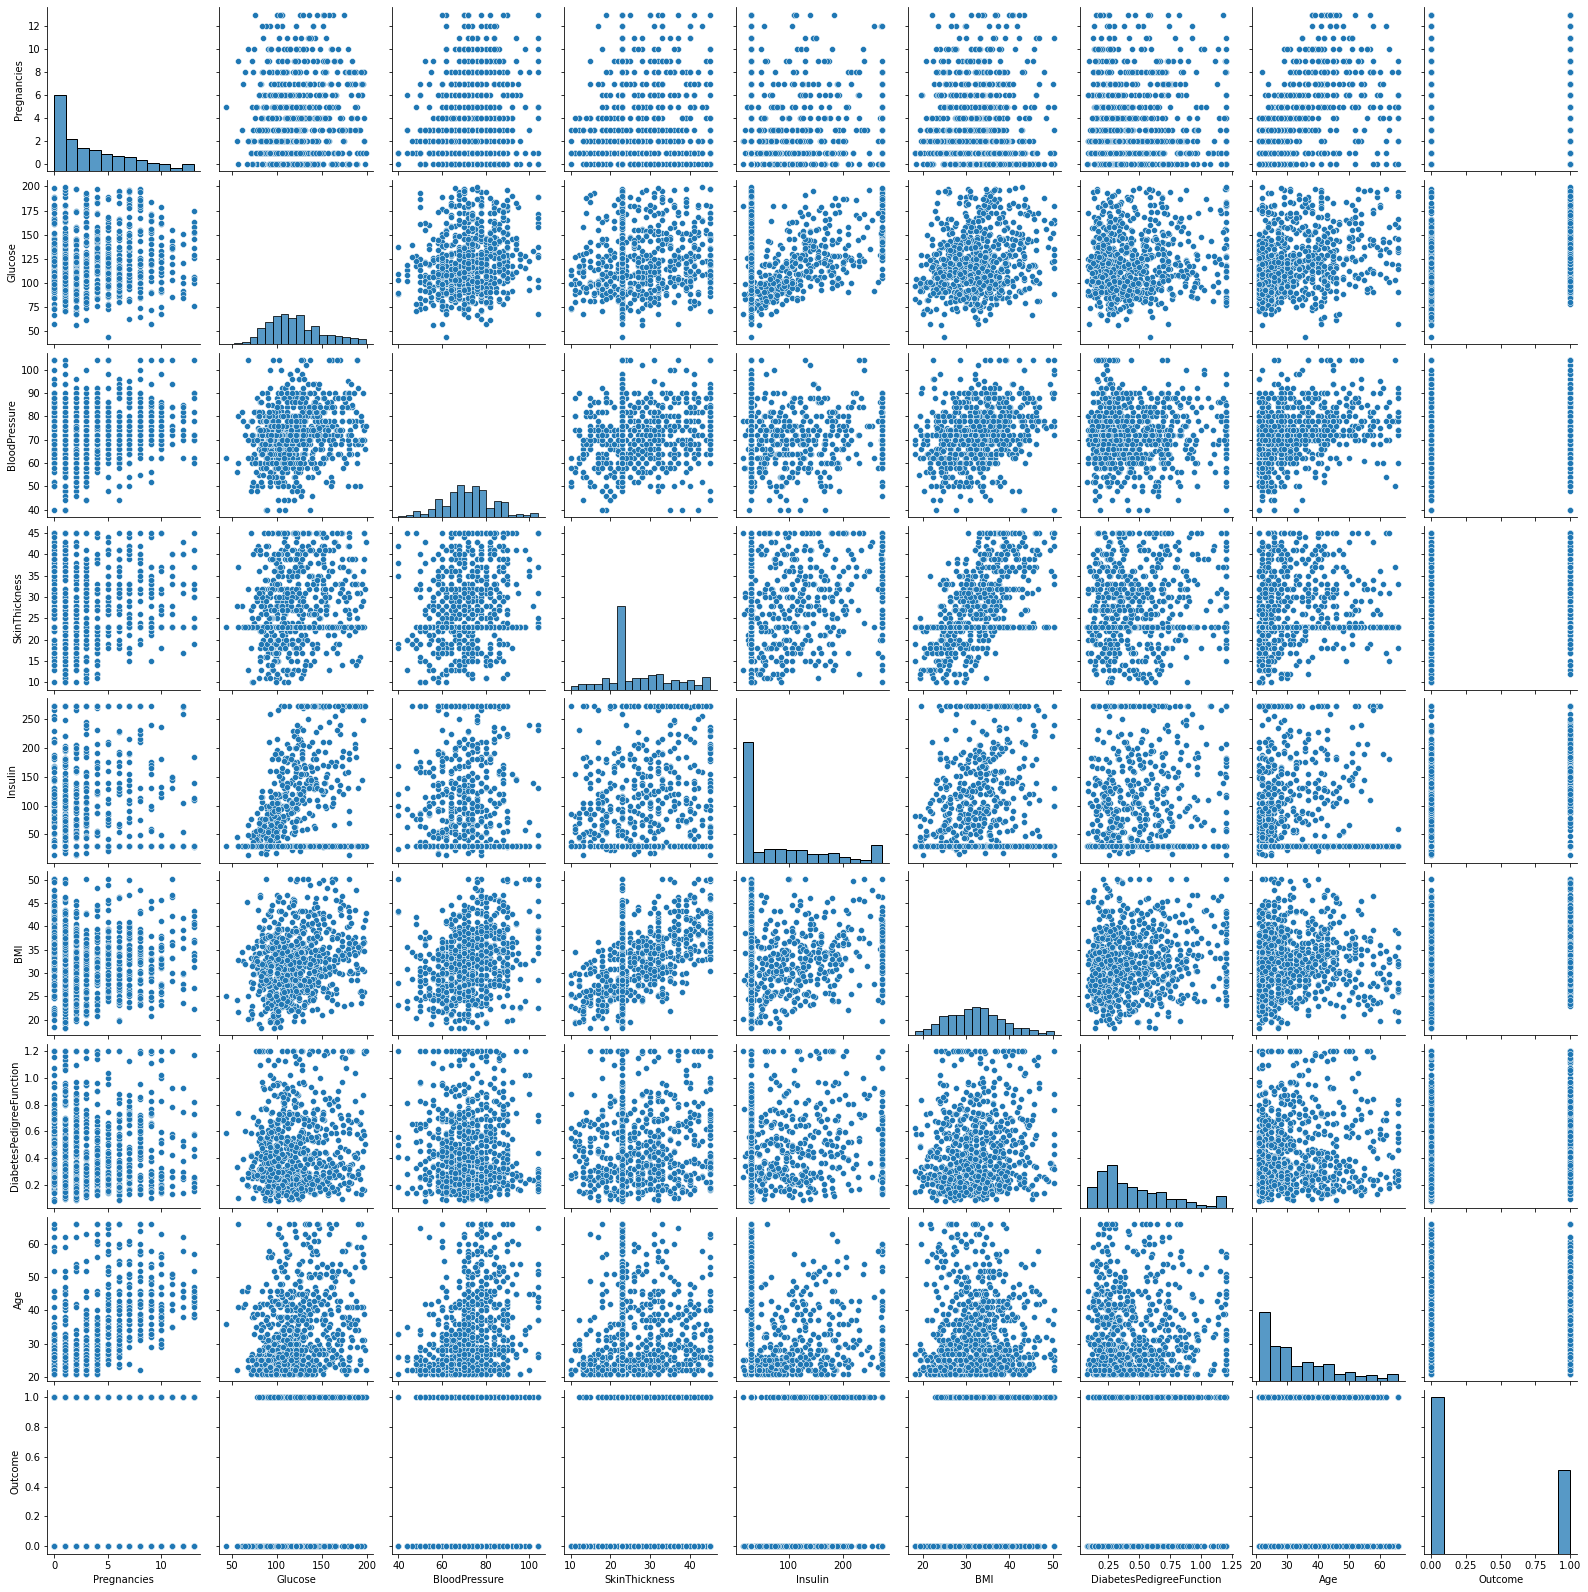

In [31]:
## Plotting the pair plot to view the relationship between the variables .

sns.pairplot(data)

## As we can see from lower and upper triangles , there is no linear relationship between 2 variables . 

<AxesSubplot:>

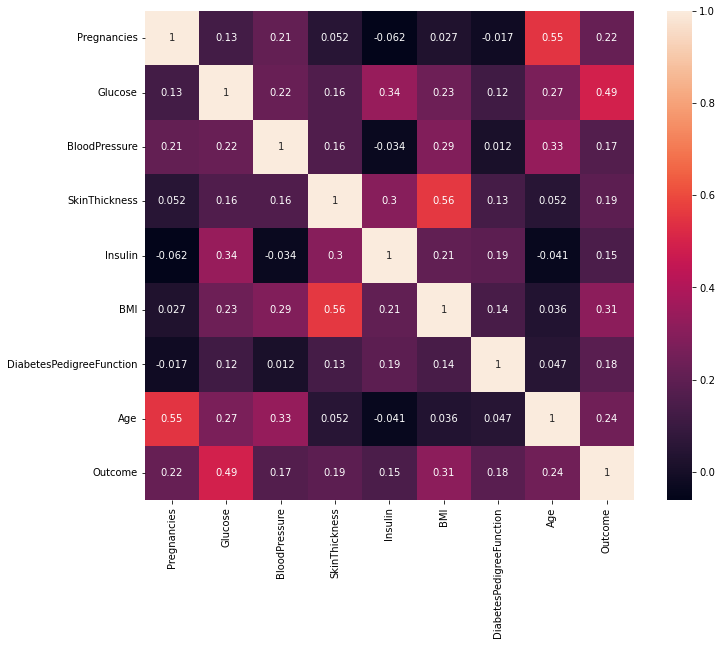

In [32]:
## Ploting a HeatMap to view the Correlarion between the Variables .

f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(data.corr(), square=True, annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='frequency'>

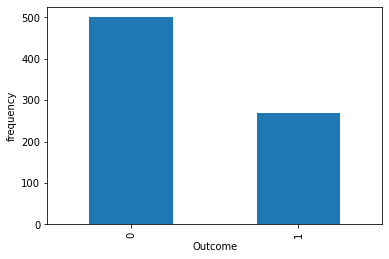

In [33]:
### Checking the balance of the data by visualising the frequency of the outcome . 

data['Outcome'].value_counts().plot(kind='bar',xlabel='Outcome', ylabel='frequency')

###  268 of 768 values are 1, and the others are 0

### <u> Model Building </u>

The outcome in the given  problem is having only 2 values ( 0 and 1 ) . 
Hence given Problem is a classic example of Binary Classification .There are many classification 
algorithms available like 

1) Logistic Regression <br>
2) Support Vector Machine <br>
3) Naive Bayes Algorithm <br>
4) K-Nearest Neighbors <br>
5) Decision Trees and <br>
6) Random Forest 

Out of all Logistic Regression and Support Vector Machine is used only for Binary classification . 

Here , I am using the below four algorithms for model building 

Logistic Regression identifies the best fit between a dependent variable and a collection of independent variables. <br>
Support Vector Machine depicts training data as points in space split into categories by as large a distance as feasible.<br>
Naive Bayes classifiers are based on Bayes’ Theorem. The fundamental assumption of Naive Bayes is that each feature makes an
independent and equal contribution to the outcome.<br>
K-Nearest Neighbour is based on Supervised Learning technique.It stores all the available data and classifies a new data point based on the similarity. <br><br>



In [34]:
# Splitting the data into train and test

features = data.drop(['Outcome'], axis = 1)
target = data[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.85, random_state = 5)

# View the shape of features and target data for both train and test . 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(652, 8)
(116, 8)
(652, 1)
(116, 1)


In [35]:
## Standardizing the feature data

ss_train = StandardScaler() 
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler() 
X_test = ss_test.fit_transform(X_test)

In [36]:
## Given Problem is a case of Binary classification . 


In [37]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

models.keys()

dict_keys(['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'K-Nearest Neighbor'])

In [38]:
accuracy, cm, sensivity, specificity, auc  = {}, {}, {}, {}, {}

print('Classification Report on Test Data : ')
print("\n")


for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    # Make predictions
    predictions = models[key].predict(X_test)
    print(key)
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    cm[key] = confusion_matrix(y_test, predictions)
    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
    sensivity[key] =  TP/(TP+FN)
    specificity[key] = TN/(TN+FP)
    auc[key] = roc_auc_score(y_test, predictions)
    # Print the classification report
    print(classification_report(y_test, predictions))
    print("\n")
    

Classification Report on Test Data : 


Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        80
           1       0.74      0.69      0.71        36

    accuracy                           0.83       116
   macro avg       0.80      0.79      0.80       116
weighted avg       0.83      0.83      0.83       116



Support Vector Machines
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        80
           1       0.76      0.69      0.72        36

    accuracy                           0.84       116
   macro avg       0.81      0.80      0.80       116
weighted avg       0.83      0.84      0.83       116



Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        80
           1       0.68      0.69      0.68        36

    accuracy                           0.80       116
   macro avg       0.77     

In [39]:
# Function that plots the roc curve based on the probabilities

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

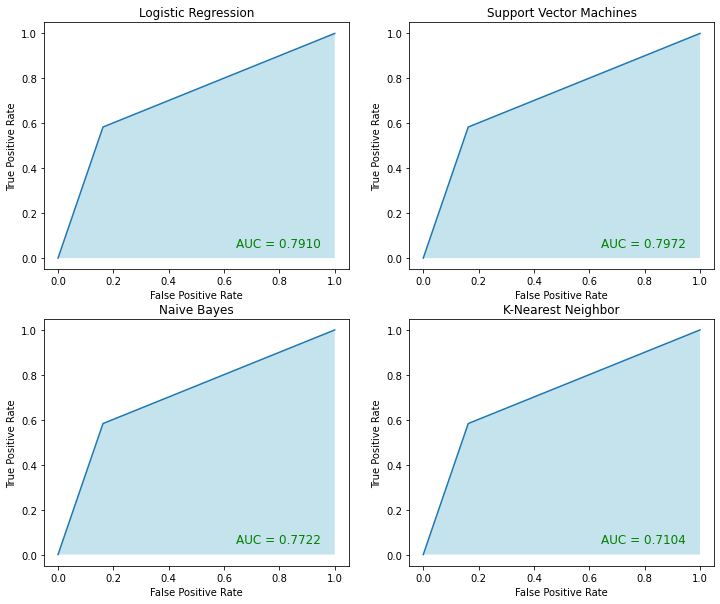

In [40]:
# plotting the ROC Curve for all the models .

i=1
plt.figure(figsize=(12,10))
for key in models.keys():
    plt.subplot(2,2,i)
    plt.title(key)
    plot_roc_curve(y_test, predictions)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc[key], ha='right', fontsize=12, color='green')
    i=i+1

In [41]:
# Creating a DataFrame which contains all the models and it metrics

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy','Confusion_Matrix' , 'Sensivity', 'Specificity'])
df_model['Accuracy'] = accuracy.values()
df_model['Confusion_Matrix'] = cm.values()
df_model['Sensivity'] = sensivity.values()
df_model['Specificity'] = specificity.values()
df_model['AUC_ROC'] = auc.values()

## Viewing the metrics for each model 
df_model

,Accuracy,Confusion_Matrix,Sensivity,Specificity,AUC_ROC
Logistic Regression,0.827586,"[[71, 9], [11, 25]]",0.694444,0.8875,0.790972
Support Vector Machines,0.836207,"[[72, 8], [11, 25]]",0.694444,0.9000,0.797222
Naive Bayes,0.801724,"[[68, 12], [11, 25]]",0.694444,0.8500,0.772222
K-Nearest Neighbor,0.758621,"[[67, 13], [15, 21]]",0.583333,0.8375,0.710417


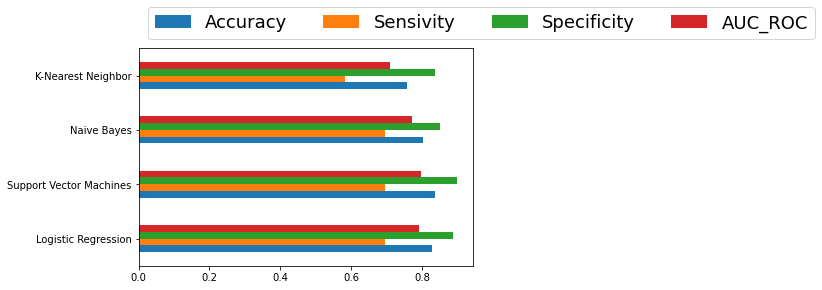

In [42]:
# Plotting the metrics in a Bar Graph .

ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 18}
)
plt.tight_layout()

### <u>Performance</u><br> 
The Performance of any model is assesed  by variuos Metric's like Accuracy,F1-Score, Confusion Matrix,
Sensitivity , Specificity and ROC Curve . <br>

For the given Problem Support Vector Machines is giving the best Metrics , 
like F1-Score :  0.88 & 0.72 , Accuracy : 0.83  and AUC_ROC : 0.7972 

Hence I would Prefer First, <u> Support Vector Machines  </u>  and Second, <u> Logistic Regression </u>  Algorithms for Model Building for the given Problem . <br><br>



<u>Data Visualization :</u> 

The following charts are created using Tableau :
<br>Pie chart to describe the diabetic or non-diabetic population
<br>Scatter charts between relevant variables to analyze the relationships
<br>Histogram or frequency charts to analyze the distribution of the data
<br>Heatmap of correlation analysis among the relevant variables
<br> Analyze different variables for these age brackets using a bubble chart.
<br>
 

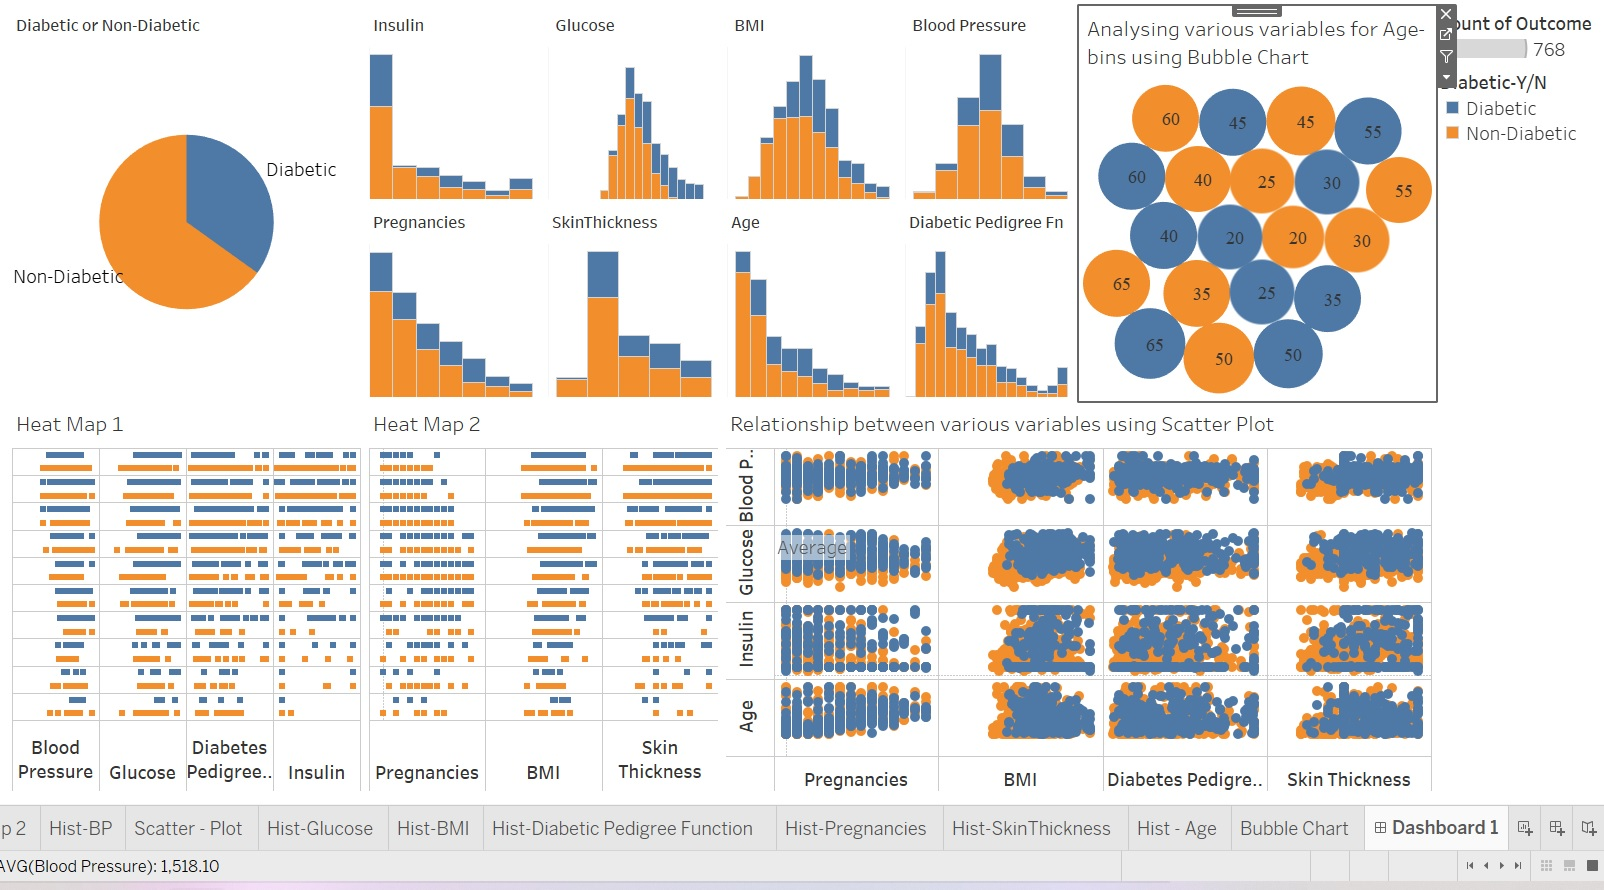

The link for the same in Tableau public server is : 

https://public.tableau.com/app/profile/bhanusri.sami/viz/Healthcare_16639910664660/Dashboard1?publish=yes